In [15]:
from json import dumps
from time import sleep
from kafka import KafkaProducer
from kafka import KafkaConsumer
from json import loads
import pyspark
from pyspark.sql import *
import matplotlib.pyplot as plt
import cv2

In [2]:
consumer = KafkaConsumer(
    'my-topic',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))

In [3]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

21/12/14 18:49:25 WARN Utils: Your hostname, robin-hppaviliondv6notebookpc resolves to a loopback address: 127.0.1.1; using 192.168.1.17 instead (on interface wlo1)
21/12/14 18:49:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/14 18:49:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/home/robinv/.local/lib/python3.9/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [128]:
df = []

In [129]:
count = 0
for message in consumer:
    # message value and key are raw bytes -- decode if necessary!
    # e.g., for unicode: `message.value.decode('utf-8')`
    print ("%s:%d:%d:" % (message.topic, message.partition,
                                          message.offset))
    id = message.value['id']
    date = message.value['date']
    data = message.value['data']
    
    df.append(pyspark.Row(id=id, date=date, data=data))

my-topic:0:72:
my-topic:0:73:
my-topic:0:74:
my-topic:0:75:
my-topic:0:76:
my-topic:0:77:
my-topic:0:78:
my-topic:0:79:
my-topic:0:80:


KeyboardInterrupt: 

In [130]:
df2 = sqlContext.createDataFrame(df)
df2.show()

+----+--------------------+--------------------+
|  id|                date|                data|
+----+--------------------+--------------------+
|4870|"2021-12-14T19:27...|[[[83, 61, 92], [...|
|4870|"2021-12-14T19:27...|[[[24, 243, 123],...|
|4884|"2021-12-14T19:27...|[[[170, 153, 214]...|
|4870|"2021-12-14T19:27...|[[[241, 56, 108],...|
|4884|"2021-12-14T19:27...|[[[78, 179, 7], [...|
|4870|"2021-12-14T19:27...|[[[188, 228, 207]...|
|4884|"2021-12-14T19:27...|[[[123, 164, 140]...|
|4870|"2021-12-14T19:27...|[[[200, 60, 122],...|
|4884|"2021-12-14T19:27...|[[[195, 96, 14], ...|
+----+--------------------+--------------------+



In [131]:
def to_numpy(img):
    img = np.array([np.array(x, dtype=np.float32) for x in img]) / 255
    return img

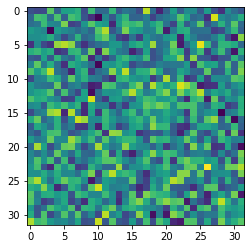

In [134]:
import numpy as np

#select all data from df2 and store it in a df named images
images = df2.select('data')
for e in images.collect():
    img = to_numpy(loads(e.data))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray)
    break